# RandomForest

랜덤 포레스트의 가장 핵심적인 특징은 임의성(randomness)에 의해 서로 조금씩 다른 특성을 갖는 트리들로 구성된다는 점이다. 이 특징은 각 트리들의 예측(prediction)들이 비상관화(decorrelation) 되게하며, 결과적으로 일반화(generalization) 성능을 향상시킨다. 또한, 임의화(randomization)는 포레스트가 노이즈가 포함된 데이터에 대해서도 강하게 만들어 준다.

[랜덤 포레스트](https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-5-%EB%9E%9C%EB%8D%A4-%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8Random-Forest%EC%99%80-%EC%95%99%EC%83%81%EB%B8%94Ensemble)

***
- Regression
    - ex. 자전거 대여량 예측
- Classification 
    - ex. 영화 리뷰 긍/부정 여부 예측
- Clustering
    - ex. 비슷한 단어끼리 묶어 단어를 군집화 (KMeans)    
- Dimensionality reduction
    - ex. W2V 화된 단어들을 t-SNE 로 시각화 (part3)

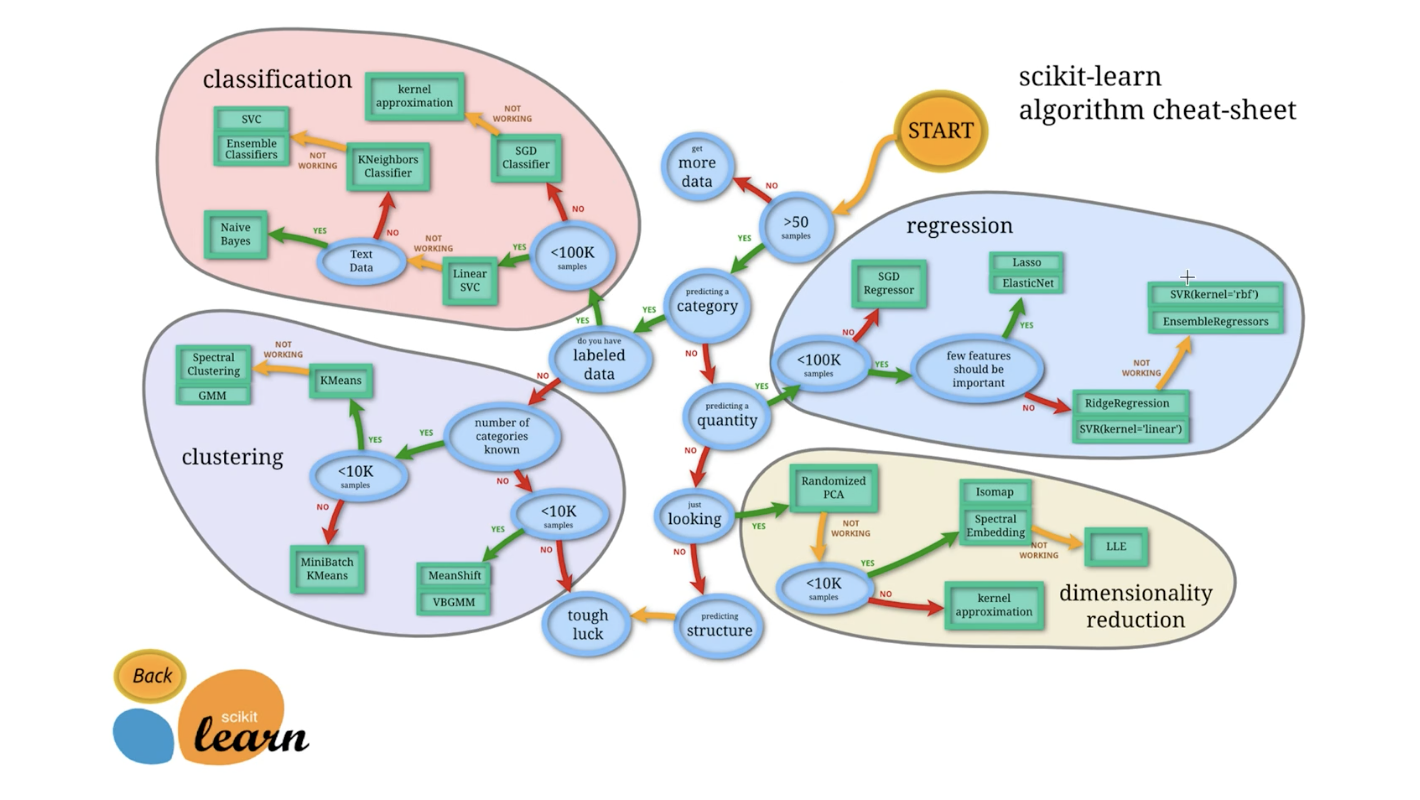

In [1]:
from IPython.display import Image
 
Image("../img/Model.png") # code안에서 나오게 할 때

## Decision Trees

# 예측

데이터 불러오기 
- raw data(train,test)
- Part1-2 에서 vector 화 한 train, test)

In [14]:
#part1-1 에서 전처리한 텍스트 데이터
import pandas as pd
import pickle

# 레이블인 sentiment 가 있는 학습 데이터
train = pd.read_csv('data/word2vec-nlp-tutorial/labeledTrainData.tsv', delimiter='\t', quoting=3)
# 레이블이 없는 테스트 데이터
test = pd.read_csv('data/word2vec-nlp-tutorial/testData.tsv', delimiter='\t', quoting=3)


with open('data/p1_train_vector.p', 'rb') as file:
    train_data_features = pickle.load(file)
    
with open('data/p1_test_vector.p', 'rb') as file:
    test_data_features = pickle.load(file)

with open('data/p1_vocab.p', 'rb') as file:
    vocab = pickle.load(file)
    
train_data_features

<25000x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 2762315 stored elements in Compressed Sparse Row format>

In [7]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 분류기를 사용
## n_estimators : 숫자가 클수록 좋은 성능
## n_jobs = -1  : 노트북의 모든 코어 모두 사용
## n_jobs = 2  : 노트북의 2개의 코어 모두 사용

forest = RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state=2018)
forest

RandomForestClassifier(n_jobs=-1, random_state=2018)

Train

In [8]:
%time forest = forest.fit(train_data_features, train['sentiment'])

CPU times: user 1min 22s, sys: 610 ms, total: 1min 23s
Wall time: 12.6 s


In [9]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(\
    forest, train_data_features, \
    train['sentiment'], cv=10, scoring='roc_auc'))
score

CPU times: user 9.89 s, sys: 3.17 s, total: 13.1 s
Wall time: 1min 59s


0.9279703680000001

Test

In [10]:
# 테스트 데이터 살펴보기

test_data_features
# 벡터화된 단어
# 각 단어가 문서에서 등장하는 횟수
test_data_features[5][:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
# 벡터화 하며 만든 사전에서 해당 단어가 무엇인지 찾아볼 수 있다.
# vocab = vectorizer.get_feature_names()
vocab[8], vocab[2558], vocab[2559], vocab[2560]

('abc', 'charact seem', 'charact set', 'charact show')

In [16]:
# 테스트 데이터를 넣고 예측한다.
result = forest.predict(test_data_features)
result[:10]

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1])

# 예측 결과 저장하기 (for kaggle 제출)

In [17]:
# 예측 결과를 저장하기 위해 데이터프레임에 담아 준다.
output = pd.DataFrame(data={'id':test['id'], 'sentiment':result})
output.head()

,id,sentiment
0,"""12311_10""",1
1,"""8348_2""",0
2,"""5828_4""",1
3,"""7186_2""",1
4,"""12128_7""",1


In [18]:
output.to_csv('data/tutorial_1_BOW_{0:.5f}.csv'.format(score), index=False, quoting=3)


In [20]:
output_sentiment = output['sentiment'].value_counts()
print("예측 != 실제 count: ", np.abs(output_sentiment[0] - output_sentiment[1]))

output_sentiment

예측 != 실제 count:  162


0    12581
1    12419
Name: sentiment, dtype: int64

In [26]:
# !pip install seaborn

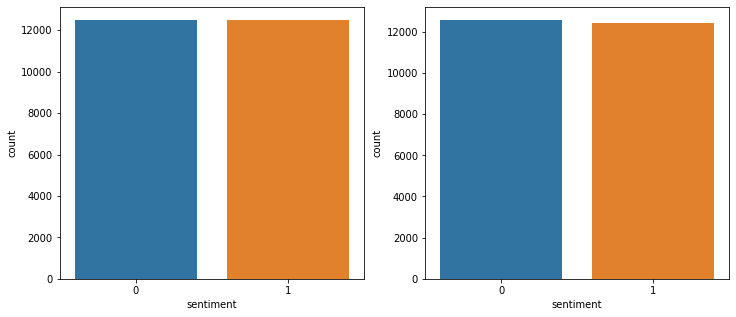

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.countplot(train['sentiment'], ax=axes[0])
sns.countplot(output['sentiment'], ax=axes[1])

*Parameter Tuning

In [ ]:
# 파라메터를 조정해 가며 점수를 조금씩 올려본다.

# uni-gram 사용 시 캐글 점수 0.84476
print(436/578)
# tri-gram 사용 시 캐글 점수 0.84608
print(388/578)
# 어간추출 후 캐글 점수 0.84780
print(339/578)
# 랜덤포레스트의 max_depth = 5 로 지정하고
# CountVectorizer의 tokenizer=nltk.word_tokenize 를 지정 후 캐글 점수 0.81460
print(546/578)
# 랜덤포레스트의 max_depth = 5 는 다시 None으로 변경
# CountVectorizer max_features = 10000개로 변경 후 캐글 점수 0.85272
print(321/578)
# CountVectorizer의 tokenizer=nltk.word_tokenize 를 지정 후 캐글 점수 0.85044
print(326/578)
# CountVectorizer max_features = 10000개로 변경 후 캐글 점수 0.85612
print(305/578)
# 0.85884
print(296/578)

print(310/578)